implementing the notebook given by @muellerzr
https://github.com/muellerzr/Practical-Deep-Learning-for-Coders-2.0/blob/master/Tabular%20Notebooks/01_Adults.ipynb

In [2]:
!pip install fastai --upgrade 

     |████████████████████████████████| 187 kB 2.8 MB/s eta 0:00:01
     |████████████████████████████████| 43 kB 1.3 MB/s  eta 0:00:01
  Attempting uninstall: fastcore
    Found existing installation: fastcore 1.0.20
    Uninstalling fastcore-1.0.20:
      Successfully uninstalled fastcore-1.0.20
  Attempting uninstall: fastai
    Found existing installation: fastai 2.0.15
    Uninstalling fastai-2.0.15:
      Successfully uninstalled fastai-2.0.15
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [3]:
from fastai.tabular.all import *

In [4]:
path = Path("../input/adult-census-income")

In [5]:
path.ls()

(#1) [Path('../input/adult-census-income/adult.csv')]

In [6]:
df = pd.read_csv(path/'adult.csv')

In [7]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


### Using TabularPandas

fastai has a new way of dealing with tabular data
It expects some dataframe, procs, cat_names, cont_names,
y_names, y_block

In [8]:
cat_names = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race']
cont_names = ['age', 'fnlwgt', 'education.num']

In [9]:
cat = Categorify()

In [10]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [11]:
to = TabularPandas(df, cat, cat_names)

In [12]:
cats = to.procs.categorify

In [13]:
cats['race']

['#na#', 'Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other', 'White']

In [14]:
to.show(max_n=3)

,workclass,education,marital.status,occupation,relationship,race
0,?,HS-grad,Widowed,?,Not-in-family,White
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White
2,?,Some-college,Widowed,?,Unmarried,Black


In [15]:
to.cats.head()

,workclass,education,marital.status,occupation,relationship,race
0,1,12,7,1,2,5
1,5,12,7,5,2,5
2,1,16,7,1,5,3
3,5,6,1,8,5,5
4,5,16,6,11,4,5


### Normalize

In [16]:
!pip install fastbook

     |████████████████████████████████| 719 kB 2.8 MB/s eta 0:00:01
     |████████████████████████████████| 47 kB 3.5 MB/s  eta 0:00:01
     |████████████████████████████████| 1.0 MB 14.1 MB/s eta 0:00:01
     |████████████████████████████████| 46 kB 3.0 MB/s  eta 0:00:01
     |████████████████████████████████| 40 kB 4.5 MB/s  eta 0:00:01
     |████████████████████████████████| 84 kB 2.4 MB/s  eta 0:00:01


     |████████████████████████████████| 45 kB 2.9 MB/s  eta 0:00:01
  Attempting uninstall: sentencepiece
    Found existing installation: sentencepiece 0.1.91
    Uninstalling sentencepiece-0.1.91:
      Successfully uninstalled sentencepiece-0.1.91
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [17]:
cont_names

['age', 'fnlwgt', 'education.num']

In [18]:
to = TabularPandas(df, Categorify() , cont_names=cont_names)
#to = TabularPandas(df, NormalizeTab(), cont_names=cont_names)


### Fill missing

In [19]:
fm = FillMissing(fill_strategy=FillStrategy.median)

In [20]:
to = TabularPandas(df, fm, cont_names=cont_names)

In [21]:
to.conts.head()

,age,fnlwgt,education.num
0,90,77053,9
1,82,132870,9
2,66,186061,10
3,54,140359,4
4,41,264663,10


In [22]:
to.cat_names

(#0) []

In [23]:
to.cats.head()

""
0
1
2
3
4


### The dataloaders

In [24]:
splits = RandomSplitter()(range_of(df))

In [25]:
splits

((#26049) [12304,29359,3247,11374,14688,14702,4303,29047,21436,26435...],
 (#6512) [31063,23173,27458,3098,23102,5434,14200,27392,25774,32369...])

In [26]:
len(df)

32561

In [27]:
cat_names = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race']
cont_names = ['age', 'fnlwgt', 'education.num']

In [28]:
procs = [Categorify, Normalize]

In [29]:
y_names = 'income'
y_block = CategoryBlock()

In [30]:
to = TabularPandas(df, procs=procs, cat_names=cat_names, cont_names=cont_names,
                   y_names= y_names, y_block=y_block, splits=splits)

### Building dataloaders

In [31]:
dls = to.dataloaders()

dls.show_batch()

,workclass,education,marital.status,occupation,relationship,race,age,fnlwgt,education.num,income
0,State-gov,Some-college,Divorced,Exec-managerial,Unmarried,Black,43.0,38536.994871,10.0,<=50K
1,State-gov,Some-college,Never-married,Other-service,Not-in-family,White,24.0,324637.002499,10.0,<=50K
2,Private,Masters,Married-civ-spouse,Exec-managerial,Husband,White,54.0,215990.000276,14.0,>50K
3,Private,Assoc-acdm,Married-civ-spouse,Craft-repair,Husband,White,46.0,74895.004865,12.0,<=50K
4,Private,HS-grad,Never-married,Handlers-cleaners,Not-in-family,White,23.0,347291.998701,9.0,<=50K
5,Local-gov,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,34.0,231826.000413,9.0,<=50K
6,Self-emp-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,28.0,31716.998327,9.0,>50K
7,Self-emp-inc,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,38.0,125324.002905,10.0,>50K
8,?,HS-grad,Divorced,?,Not-in-family,White,34.0,181933.999966,9.0,<=50K
9,Private,Bachelors,Married-civ-spouse,Farming-fishing,Husband,White,34.0,27379.994790,13.0,>50K


### creating two dataloaders

In [32]:
trn_dl = TabDataLoader(to.train, bs=64, shuffle=True, drop_last=True)
val_dl = TabDataLoader(to.valid, bs=128)

In [33]:
dls = DataLoaders(trn_dl, val_dl)
dls.show_batch()

,workclass,education,marital.status,occupation,relationship,race,age,fnlwgt,education.num,income
0,Self-emp-not-inc,Assoc-voc,Divorced,Craft-repair,Not-in-family,White,30.0,45427.006003,11.0,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Wife,White,25.0,37741.005004,13.0,<=50K
2,Federal-gov,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,58.0,200042.000153,10.0,>50K
3,Private,Some-college,Never-married,Other-service,Not-in-family,White,35.0,52186.999061,10.0,<=50K
4,Private,Bachelors,Married-civ-spouse,Sales,Husband,White,30.0,226443.000897,13.0,>50K
5,Private,Assoc-voc,Divorced,Adm-clerical,Unmarried,White,45.0,184277.000092,11.0,>50K
6,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,46.0,58126.006058,9.0,<=50K
7,Private,HS-grad,Married-civ-spouse,Craft-repair,Own-child,Asian-Pac-Islander,30.0,72887.002640,9.0,<=50K
8,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,42.0,117318.997466,9.0,<=50K
9,Self-emp-inc,Some-college,Never-married,Exec-managerial,Not-in-family,White,30.0,205733.000419,10.0,<=50K


In [34]:
to._dbunch_type

fastai.tabular.data.TabularDataLoaders

In [35]:
dls._dbunch_type

fastai.tabular.data.TabularDataLoaders

### Tabular Learner

### Categorical variables

When dealing with our categorical data, we create what is called an embedding matrix. This allows for a higher dimentionality for relationships between the different categorical cardinalities.

In [36]:


def get_emb_sz(to, sz_dict=None):
    "Get default embedding size from `TabularPreprocessor` `proc` or the ones in `sz_dict`"
    return [_one_emb_sz(to.classes, n, sz_dict) for n in to.cat_names]



In [37]:
def _one_emb_sz(classes, n, sz_dict=None):
    "Pick an embedding size for `n` depending on `classes` if not given in `sz_dict`."
    sz_dict = ifnone(sz_dict, {})
    n_cat = len(classes[n])
    sz = sz_dict.get(n, int(emb_sz_rule(n_cat)))  # rule of thumb
    return n_cat,sz

In [38]:
def emb_sz_rule(n_cat):
    "Rule of thumb to pick embedding size corresponding to `n_cat`"
    return min(600, round(1.6 * n_cat**0.56))


In [39]:
emb_szs = get_emb_sz(to)
emb_szs

[(10, 6), (17, 8), (8, 5), (16, 8), (7, 5), (6, 4)]

In [40]:
to.cat_names

(#6) ['workclass','education','marital.status','occupation','relationship','race']

In [41]:
to['workclass'].nunique()

9

### Numerical Variables

In [42]:
cont_len = len(to.cont_names)
cont_len

3

### Tabular Model

In [43]:
batch = dls.one_batch()

In [44]:
len(batch)

3

In [45]:
batch[0][0], batch[1][0]

(tensor([ 8, 13,  1,  5,  2,  5]), tensor([0.2507, 0.2835, 1.5185]))

In [46]:
net = TabularModel(emb_szs, cont_len, 2, [200, 100])

In [47]:
net

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(10, 6)
    (1): Embedding(17, 8)
    (2): Embedding(8, 5)
    (3): Embedding(16, 8)
    (4): Embedding(7, 5)
    (5): Embedding(6, 4)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): BatchNorm1d(39, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=39, out_features=200, bias=False)
      (2): ReLU(inplace=True)
    )
    (1): LinBnDrop(
      (0): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=200, out_features=100, bias=False)
      (2): ReLU(inplace=True)
    )
    (2): LinBnDrop(
      (0): Linear(in_features=100, out_features=2, bias=True)
    )
  )
)

In [48]:
learn = tabular_learner(dls, [200,100], metrics=accuracy)

SuggestedLRs(lr_min=0.005754399299621582, lr_steep=1.5848932266235352)

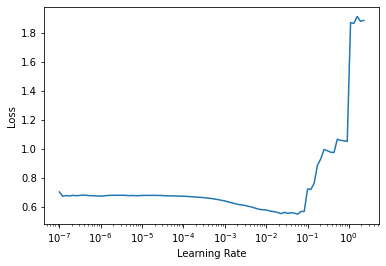

In [49]:
learn.lr_find()

In [50]:
learn.fit(3, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.365500,0.373328,0.826474,00:06
1,0.359112,0.359713,0.828471,00:05
2,0.354929,0.356734,0.832924,00:05


In [51]:
dls = to.dataloaders(bs=1024)

In [52]:
learn = tabular_learner(dls, [200,100], metrics=accuracy)

SuggestedLRs(lr_min=0.025118863582611083, lr_steep=0.001737800776027143)

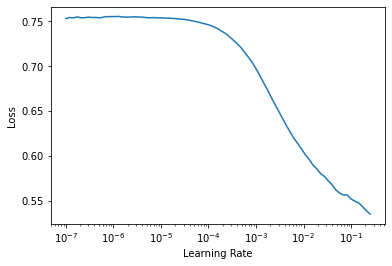

In [53]:
learn.lr_find()

In [54]:
learn.fit(3, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.394322,0.429195,0.813114,00:01
1,0.367827,0.359446,0.832617,00:01
2,0.356899,0.352480,0.833538,00:01


In [55]:
dls = to.dataloaders(bs=4096)
learn = tabular_learner(dls, [200,100], metrics=accuracy)

SuggestedLRs(lr_min=0.03630780577659607, lr_steep=0.0014454397605732083)

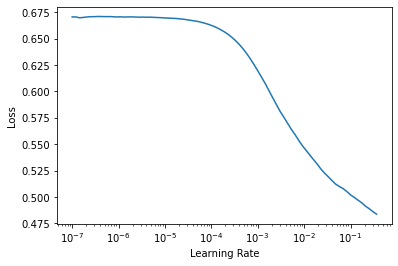

In [56]:
learn.lr_find()

In [57]:
learn.fit_one_cycle(3,1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.508119,0.562231,0.794533,00:00
1,0.434242,0.470572,0.785934,00:00
2,0.404563,0.448972,0.789158,00:00


In [58]:
learn.export('myModel.pkl')

In [59]:
del learn

In [60]:
learn = load_learner('myModel.pkl')

In [61]:
dl = learn.dls.test_dl(df.iloc[:100])

In [62]:
dl.show_batch()

,workclass,education,marital.status,occupation,relationship,race,age,fnlwgt,education.num,income
0,?,HS-grad,Widowed,?,Not-in-family,White,90.000000,77052.996871,9.0,<=50K
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,81.999999,132869.999978,9.0,<=50K
2,?,Some-college,Widowed,?,Unmarried,Black,65.999999,186060.999979,10.0,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,54.000000,140359.001312,4.0,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,41.000000,264663.000004,10.0,<=50K
5,Private,HS-grad,Divorced,Other-service,Unmarried,White,34.000000,216863.999094,9.0,<=50K
6,Private,10th,Separated,Adm-clerical,Unmarried,White,38.000000,150600.998719,6.0,<=50K
7,State-gov,Doctorate,Never-married,Prof-specialty,Other-relative,White,73.999999,88637.999941,16.0,>50K
8,Federal-gov,HS-grad,Divorced,Prof-specialty,Not-in-family,White,68.000001,422012.991074,9.0,<=50K
9,Private,Some-college,Never-married,Craft-repair,Unmarried,White,41.000000,70036.994829,10.0,>50K


In [64]:
df2 = df.iloc[:100].drop('income', axis=1)

In [65]:
df2.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States


In [66]:
dl = learn.dls.test_dl(df2)

In [67]:
dl.show_batch()

,workclass,education,marital.status,occupation,relationship,race,age,fnlwgt,education.num
0,?,HS-grad,Widowed,?,Not-in-family,White,90.000000,77052.996871,9.0
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,81.999999,132869.999978,9.0
2,?,Some-college,Widowed,?,Unmarried,Black,65.999999,186060.999979,10.0
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,54.000000,140359.001312,4.0
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,41.000000,264663.000004,10.0
5,Private,HS-grad,Divorced,Other-service,Unmarried,White,34.000000,216863.999094,9.0
6,Private,10th,Separated,Adm-clerical,Unmarried,White,38.000000,150600.998719,6.0
7,State-gov,Doctorate,Never-married,Prof-specialty,Other-relative,White,73.999999,88637.999941,16.0
8,Federal-gov,HS-grad,Divorced,Prof-specialty,Not-in-family,White,68.000001,422012.991074,9.0
9,Private,Some-college,Never-married,Craft-repair,Unmarried,White,41.000000,70036.994829,10.0


In [68]:
learn.validate(dl=dl)

(#2) [None,None]

In [69]:


dl = learn.dls.test_dl(df.iloc[:100])



learn.validate(dl=dl)



(#2) [0.7774420380592346,0.5600000023841858]